# Analyser les sentiments exprimés dans les critiques de films avec Keras

Keras est une API de réseaux neuronaux de haut niveau écrite en Python, qui s’exécute en s’appuyant sur d’autres outils d’apprentissage profond tels que TensorFlow. Ce module utilise Keras pour créer un réseau neuronal qui évalue les sentiments exprimés dans du texte, comme les critiques de films publiées par des utilisateurs.

La création de réseaux neuronaux peut être complexe. Même avec l’aide de bibliothèques populaires comme Microsoft Cognitive Toolkit et TensorFlow, il faut souvent écrire plusieurs centaines de lignes de code pour créer un réseau neuronal pleinement opérationnel. C’est l’une des raisons pour lesquelles Keras s’est imposé dans la communauté de l’apprentissage profond (le « deep learming »). Keras est une bibliothèque Python open source qui simplifie considérablement la création de réseaux neuronaux. Elle s’appuie sur d’autres bibliothèques, comme Microsoft Cognitive Toolkit, TensorFlow ou Theano pour faire le gros du travail. Grâce à Keras, vous pouvez créer des réseaux neuronaux sophistiqués avec seulement quelques dizaines de lignes de code, puis entraîner ces réseaux pour classifier des images, analyser les sentiments exprimés dans du texte, traiter le langage naturel et réaliser d’autres tâches où l’apprentissage profond est particulièrement performant.

Dans ce module, on utilise Keras pour créer un réseau neuronal qui évalue les sentiments exprimés dans un texte. Une entrée comme « Service remarquable et l’un des meilleurs restaurants de sushis que j’ai testés » aura un score proche de 1.0 indiquant un sentiment positif, tandis qu’une entrée comme « les plats étaient fades et le service était horrible » aura un score avoisinant 0.0. Aujourd’hui, ces systèmes sont largement employés sur Twitter, Yelp et d’autres services de réseaux sociaux pour analyser les sentiments concernant des entreprises et des candidats politiques.

## Créer et entraîner un réseau neuronal

Avant de pouvoir entraîner un réseau neuronal, vous devez préparer les données qui seront utilisées pour son entraînement. Ici on utilise le jeu de données de la classification des sentiments des critiques de films d’IMDB qui est fourni avec Keras. 

Le jeu de données IMDB contient 50 000 critiques de films qui ont chacune été évaluées comme positive (1) ou négative (0). Il est subdivisé en 25 000 critiques pour l’entraînement et 25 000 critiques pour les tests. Sur la base des sentiments exprimés dans ces critiques, votre réseau neuronal va analyser le texte qui lui est présenté et évaluer les sentiments.

## Chargement du jeu de données IMDB

In [50]:
from keras.datasets import imdb
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

Ce code charge le jeu de données IMDB inclus avec Keras, puis il crée un dictionnaire qui mappe les mots contenus dans l’ensemble des 50 000 critiques à des nombres entiers indiquant la fréquence d’emploi relative des mots. Chaque mot est mappé à un entier unique. Le mot le plus fréquent reçoit le nombre 1, le deuxième le nombre 2, et ainsi de suite. load_data retourne également une paire de tuples qui contiennent les critiques de films (dans cet exemple, x_train et x_test) ainsi que les scores 1 et 0 qui classifient ces critiques comme positives ou négatives (y_train et y_test). 

In [51]:
len(x_train)

25000

In [52]:
len(y_train)

25000

In [53]:
len(x_test)

25000

In [54]:
len(y_test)

25000

La variable x_train est une liste de 25 000 listes, chacune d’elles représentant une critique de film. (x_test est également une liste de 25 000 listes représentant 25 000 critiques. x_train est utilisée pour l’entraînement, tandis que x_test est utilisée pour les tests.) Les listes internes, celles représentant des critiques de films, ne contiennent pas de mots, mais des nombres entiers à la place. 

La raison pour laquelle les listes internes contiennent des nombres plutôt que du texte est que l’entraînement d’un réseau neuronal s’effectue avec des nombres, pas avec du texte. Plus précisément, l’entraînement est basé sur des tenseurs. Dans ce cas, chaque critique est un tenseur à une seule dimension (comme un tableau unidimensionnel) contenant des entiers qui identifient les mots employés dans la critique. 

###### Entiers représentant la première critique dans le jeu d’entraînement IMDB

In [55]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

Le premier nombre dans la liste, 1, ne représente pas un mot. Il indique le début de la critique et est identique pour chaque critique dans le jeu de données. Les nombres 0 et 2 sont également réservés. Vous soustrayez 3 des autres nombres pour mapper un entier dans une critique à l’entier correspondant dans le dictionnaire. Le deuxième nombre, 14, référence le mot qui correspond au nombre 11 dans le dictionnaire, le troisième nombre représente le mot correspondant au nombre 19 dans le dictionnaire, et ainsi de suite.

###### A quoi ressemble le dictionnaire ?

In [56]:
#Mots mappés à des entiers dans le dictionnaire
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

On voit seulement une partie des entrées du dictionnaire, mais en tout, le dictionnaire comprend plus de 88 000 mots et les entiers associés. La sortie qu'on verra sera probablement différente de celle illustrée dans la capture d’écran, car le dictionnaire est généré à chaque nouvel appel de load_data.

Comme vous l’avez vu, chaque critique dans le jeu de données est encodée comme une collection de nombres entiers au lieu de mots. 

Est-il possible de contrepasser l’encodage d’une critique afin de voir le texte initial de la critique ? 

###### Première critique au format texte

In [57]:
# critique dans x_train au format texte :
word_dict = imdb.get_word_index()
# ajouter 3 aux valeurs du dictionnaire
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Dans la sortie, « > » marque le début de la critique, tandis que « ? » signale les mots qui ne figurent pas parmi les 10 000 mots les plus fréquents dans le jeu de données. Ces mots « inconnus » sont mappés au nombre 2 dans la liste des entiers représentant une critique. Vous vous souvenez du paramètre num_words que vous avez passé à load_data ? C’est maintenant qu’il entre en jeu. Ce paramètre ne réduit pas la taille du dictionnaire, mais il restreint la plage d’entiers utilisés pour encoder les critiques. 

###### Convertir les tenseurs au même longueur

Les critiques sont « propres », c’est-à-dire que les lettres ont été converties en minuscules et que les caractères de ponctuation ont été supprimés. Toutefois, elles ne sont pas encore prêtes pour entraîner un réseau neuronal à analyser les sentiments exprimés dans le texte. Quand on entraîne un réseau neuronal avec une collection de tenseurs, tous les tenseurs doivent avoir la même longueur. Or les listes représentant les critiques dans x_train et x_test sont actuellement de longueur différente.

Heureusement, Keras inclut une fonction qui prend une liste de listes en entrée et convertit les listes internes à une longueur spécifiée, en les tronquant si nécessaire ou en les remplissant avec des zéros (0). 

In [58]:
from keras.preprocessing import sequence
# limiter toutes les listes représentant des critiques de films dans x_train et x_test à une longueur de 500 entiers
max_review_length = 500 
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

### Création du réseau neuronal qui effectue l’analyse des sentiments avec Keras

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


### Détails du code ci-dessus

Ce code est la base à partir duquel vous construisez un réseau neuronal avec Keras. 

- Il instancie d’abord un objet Sequential représentant un modèle « séquentiel », qui se compose d’une pile de couches de bout en bout où la sortie d’une couche constitue l’entrée de la couche suivante.

Les instructions suivantes ajoutent des couches au modèle.

- La première est une couche d’incorporation, qui est essentielle dans les réseaux neuronaux qui traitent des mots. La couche d’incorporation mappe essentiellement des tableaux à plusieurs dimensions contenant des index de mots entiers en tableaux de valeurs à virgule flottante contenant moins de dimensions. Elle permet également de traiter des mots ayant des significations similaires de manière identique. 


- Après l’ajout de la couche d’incorporation, Flatten est appelé pour remettre en forme la sortie à passer en entrée à la couche suivante.


- Les trois couches suivantes ajoutées au modèle sont des couches denses, également appelées couches entièrement connectées. Ce sont les couches classiques qui figurent en principe dans les réseaux neuronaux. Chaque couche contient n nœuds ou neurones, et chaque neurone reçoit une entrée de chaque neurone de la couche précédente, d’où le terme de couches « entièrement connectées ». Ces couches permettent au réseau neuronal d’« apprendre » à partir des données d’entrée en devinant la sortie de manière itérative, en vérifiant les résultats et en ajustant les connexions pour affiner les résultats. Les deux premières couches denses dans ce réseau contiennent 16 neurones chacune. Ce nombre a été choisi arbitrairement. Vous pouvez essayer différentes tailles afin d’améliorer la précision du modèle. La dernière couche dense contient un seul neurone, car l’objectif final du réseau est de prédire une sortie unique, à savoir un score de sentiment compris entre 0.0 et 1.0.


- L’appel à la fonction compile « compile » le modèle en spécifiant différents paramètres importants à utiliser, comme l’optimiseur ainsi que les métriques d’évaluation de la précision du modèle à chaque étape de l’entraînement.

Le résultat est le réseau neuronal illustré ci-dessous. Le réseau contient une couche d’entrée, une couche de sortie et deux couches masquées (les couches denses contenant 16 neurones chacune).

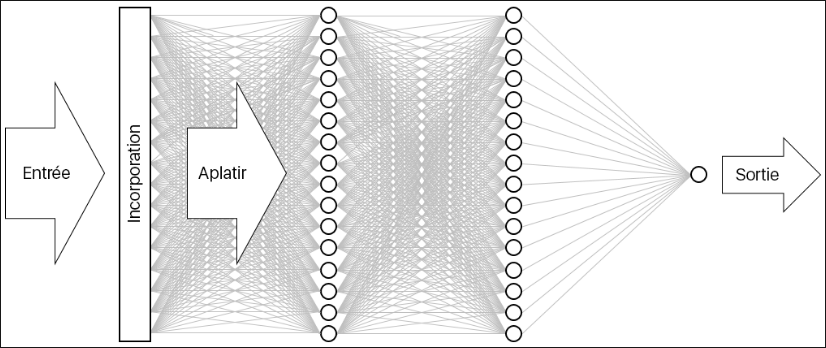

### Appelez maintenant la fonction fit pour entraîner le réseau neuronal :

In [60]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 13s 505us/step - loss: 0.5126 - accuracy: 0.7172 - val_loss: 0.2912 - val_accuracy: 0.8770
Epoch 2/5
25000/25000 [==============================] - 10s 419us/step - loss: 0.1860 - accuracy: 0.9296 - val_loss: 0.3005 - val_accuracy: 0.8733
Epoch 3/5
25000/25000 [==============================] - 9s 369us/step - loss: 0.0657 - accuracy: 0.9830 - val_loss: 0.3448 - val_accuracy: 0.8746
Epoch 4/5
25000/25000 [==============================] - 9s 370us/step - loss: 0.0156 - accuracy: 0.9978 - val_loss: 0.4235 - val_accuracy: 0.8669
Epoch 5/5
25000/25000 [==============================] - 9s 369us/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 0.4662 - val_accuracy: 0.8698


L’entraînement prend environ six minutes, ou un peu plus d’une minute par époque (epoch). 

epochs=5 indique à Keras de faire cinq passes vers l’avant et l’arrière dans le modèle. À chaque passe, le modèle poursuit son apprentissage à partir des données d’entraînement et mesure (« valide ») son niveau d’apprentissage à l’aide des données de test. Ensuite, il apporte des ajustements et revient en arrière pour la passe ou l’époque suivante. Cela est traduit dans la sortie de la fonction fit, qui montre la précision d’entraînement (acc) et la précision de validation (val_acc) pour chaque époque.

batch_size=128 indique à Keras d’utiliser 128 exemples de données d’entraînement à la fois pour entraîner le réseau. Les tailles de lots plus grandes accélèrent l’entraînement (car moins de passes sont nécessaires dans chaque époque pour consommer l’intégralité des données d’entraînement). En revanche, les tailles de lots plus petites tendent à améliorer la précision. À la fin de ce labo, si vous le souhaitez, vous pourrez revenir en arrière et réentraîner le modèle en utilisant une taille de lot de 32 afin de voir l’effet éventuel de ce changement sur la précision du modèle. Avec cette taille, l’entraînement est à peu près deux fois plus long.

Ce modèle est atypique en ce sens qu’il réussit à bien apprendre en seulement quelques époques. La précision d’entraînement s’approche vite des 100 %, tandis que la précision de validation augmente pendant une ou deux époques avant de se stabiliser. En règle générale, vous ne souhaiterez pas entraîner un modèle plus longtemps que la durée nécessaire pour stabiliser ces précisions. Le risque est le surajustement du modèle, qui donne de meilleurs résultats sur les données de test que sur les données réelles. Quand vous observez un écart croissant entre la précision d’entraînement et la précision de validation, c’est le signe d’un surajustement du modèle. 

###### Visualiser les changements dans les précisions d’entraînement et de validation au fil du processus d’entraînement

[]

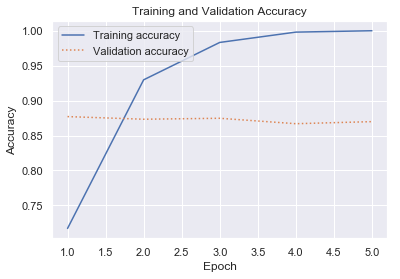

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

Les données sur la précision proviennent de l’objet history retourné par la fonction fit du modèle. Sur la base du graphique que vous voyez ici, vous recommanderiez d’augmenter le nombre d’époques d’entraînement, de le diminuer ou de le laisser identique ?

###### Un autre moyen de détecter un surajustement

Un autre moyen de détecter un surajustement est de comparer la perte d’entraînement et la perte de validation tout au long de l’entraînement. Les problèmes d’optimisation tels que celui-ci cherchent à minimiser une fonction de perte (loss). 

- Si, pour une époque donnée, vous observez une perte d’entraînement beaucoup plus grande que la perte de validation, cela peut être le signe d’un surajustement. 

À l’étape précédente, vous avez utilisé les propriétés acc et val_acc de la propriété history de l’objet history pour tracer les précisions d’entraînement et de validation. La même propriété contient également des valeurs nommées loss et val_loss qui représentent une perte d’entraînement et une perte de validation, respectivement.

[]

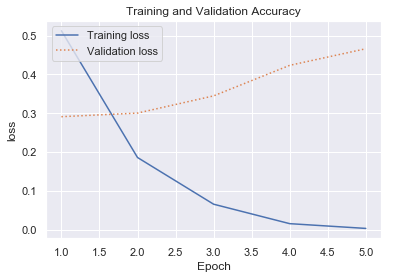

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training loss')
plt.plot(epochs, val, ':', label='Validation loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.plot()

###### déterminer avec quelle précision le modèle est capable de quantifier les sentiments exprimés dans le texte à partir des données de test dans x_test (critiques) et y_test (valeurs 0 et 1, ou « étiquettes », indiquant si les critiques sont positives ou négatives) :

In [63]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 86.98%


Vous avez probablement atteint une précision comprise entre 85 % et 90 %. C’est un résultat convenable si l’on tient compte du fait que vous avez créé le modèle à partir de zéro (au lieu d’avoir utilisé un réseau neuronal préentraîné) et que la durée d’entraînement était courte même sans un GPU. Il est possible d’obtenir des précisions de 95 % ou plus avec d’autres architectures de réseau neuronal, en particulier avec les réseaux de neurones récurrents qui utilisent des couches LSTM (mémoire à court et long terme ). Keras facilite la création de réseaux de ce type, mais la durée d’entraînement peut augmenter de manière exponentielle. Le modèle que vous avez créé offre un équilibre raisonnable entre la précision et la durée d’entraînement.

###### Conclusion du modèle :

Nous pouvons observer une stabilisation de la précision de validation après seulement deux époques. Une fois que la précision de validation s’est stabilisée, une augmentation continue de la précision d’entraînement est le signe d’un surajustement. Comme nous souhaitons éviter le surajustement du modèle, nous ne voulons pas conserver autant d’époques.

- On peut diminuer le nombre d’époques d’entraînement.

## Utiliser le réseau neuronal pour analyser les sentiments exprimés dans un texte

Le véritable test arrive au moment où on entrez notre propre texte dans le modèle pour voir comment celui-ci fonctionne, autrement dit, pour déterminer sa capacité à quantifier les sentiments exprimés dans ce texte. Dans cette unité, on va écrire une fonction Python qui accepte une chaîne de texte en entrée, la passe au modèle et retourne un score de sentiment. Ensuite, on utilise la fonction pour analyser les sentiments exprimés dans différentes chaînes de texte.

In [64]:
import string
import numpy as np

def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

Les instructions définissent une fonction nommée analyze qui prend une chaîne en entrée et retourne un nombre entre 0.0 et 1.0 qui quantifie les sentiments exprimés dans cette chaîne. Plus le nombre est grand, plus le sentiment est positif. La fonction nettoie la chaîne d’entrée, la convertit en une liste d’entiers mappés à des mots dans le dictionnaire créé par la fonction load_data et, pour finir, appelle la fonction predict du modèle pour évaluer les sentiments exprimés dans le texte.

In [65]:
analyze('Easily the most stellar experience I have ever had.')

0.93614143

Pour terminer, testez le modèle en utilisant vos propres chaînes d’entrée. Le résultat ne sera pas parfait, mais vous verrez sans doute que le modèle réussit plutôt bien à quantifier les sentiments. Même si le modèle a été entraîné avec des critiques de films, il n’est pas limité à l’analyse de ce genre de critiques. C’est logique, car il existe par nature des similitudes entre le langage servant à exprimer un avis positif ou négatif sur un film et les mots employés pour exprimer des sentiments sur tout autre sujet.